In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('human_cognitive_performance.csv')
df.head()

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  int64  
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 7.9+ MB


In [6]:
df.describe()

,Age,Sleep_Duration,Stress_Level,Daily_Screen_Time,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,38.525525,7.005332,5.493762,6.504646,248.988213,399.973579,69.498350,58.172395,58.121357
std,12.101876,1.734435,2.865308,3.167072,144.541990,115.369329,17.305659,23.058522,23.119598
min,18.000000,4.000000,1.000000,1.000000,0.000000,200.000000,40.000000,0.000000,0.000000
25%,28.000000,5.500000,3.000000,3.800000,123.000000,300.150000,55.000000,40.910000,40.850000
50%,39.000000,7.000000,5.000000,6.500000,249.000000,400.360000,70.000000,58.360000,58.360000
75%,49.000000,8.500000,8.000000,9.200000,375.000000,499.250000,85.000000,75.830000,75.890000
max,59.000000,10.000000,10.000000,12.000000,499.000000,599.990000,99.000000,100.000000,100.000000


In [7]:
df.shape

(80000, 13)

In [8]:
df.isnull().sum()

,0
User_ID,0
Age,0
Gender,0
Sleep_Duration,0
Stress_Level,0
Diet_Type,0
Daily_Screen_Time,0
Exercise_Frequency,0
Caffeine_Intake,0
Reaction_Time,0


In [9]:
num = df.select_dtypes(include='number', exclude='object')
cat = df.select_dtypes(include='object')

In [10]:
num.columns

Index(['Age', 'Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time',
       'Caffeine_Intake', 'Reaction_Time', 'Memory_Test_Score',
       'Cognitive_Score', 'AI_Predicted_Score'],
      dtype='object')

In [11]:
cat.columns

Index(['User_ID', 'Gender', 'Diet_Type', 'Exercise_Frequency'], dtype='object')

In [12]:
cat = cat.drop('User_ID', axis=1)
cat.head()

,Gender,Diet_Type,Exercise_Frequency
0,Female,Non-Vegetarian,Medium
1,Female,Non-Vegetarian,High
2,Male,Vegetarian,Low
3,Male,Vegetarian,Low
4,Male,Non-Vegetarian,Medium


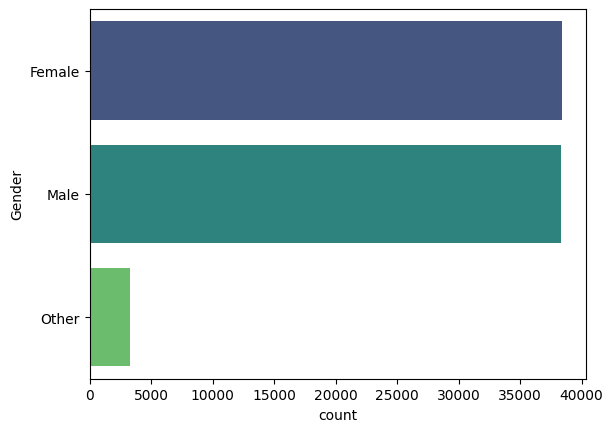

In [13]:
sns.countplot(df['Gender'], palette = 'viridis')
plt.show()

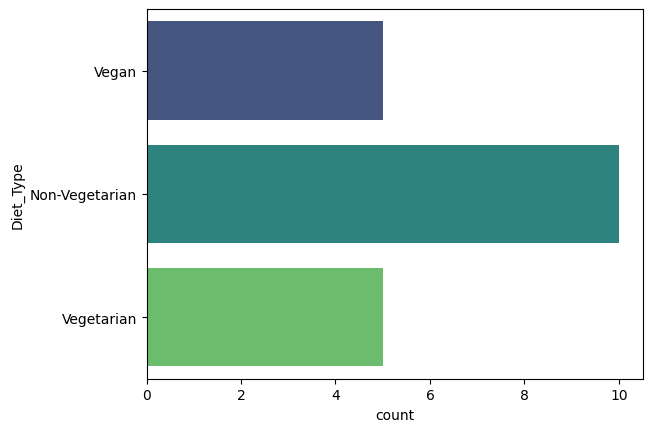

In [14]:
sample = df.sample(20)
sns.countplot(sample['Diet_Type'], palette = 'viridis')
plt.show()


In [15]:
num.columns

Index(['Age', 'Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time',
       'Caffeine_Intake', 'Reaction_Time', 'Memory_Test_Score',
       'Cognitive_Score', 'AI_Predicted_Score'],
      dtype='object')

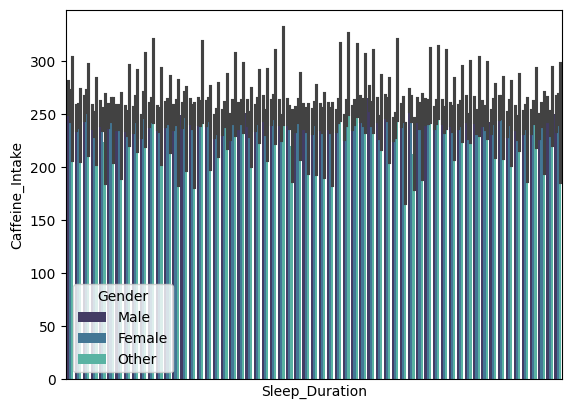

In [16]:
sns.barplot(data=df, x='Sleep_Duration', y='Caffeine_Intake', hue = 'Gender', palette='mako')
plt.xticks([])
plt.show()

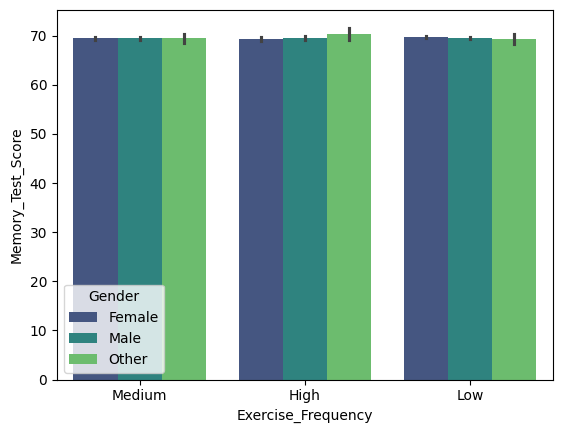

In [17]:
sns.barplot(data=df, x='Exercise_Frequency', y='Memory_Test_Score', hue='Gender', palette='viridis')
plt.show()

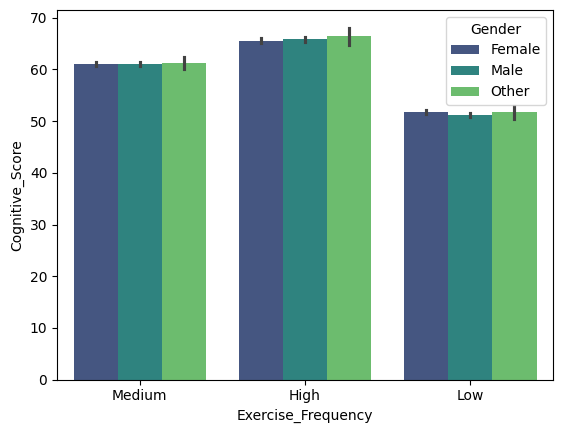

In [18]:
sns.barplot(data=df, x='Exercise_Frequency', y='Cognitive_Score', hue='Gender', palette='viridis')
plt.show()

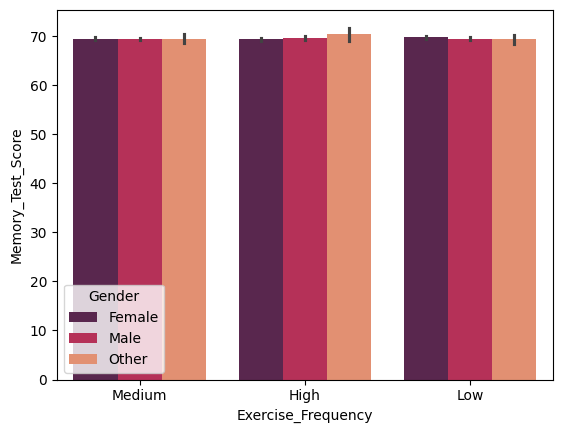

In [19]:
sns.barplot(data=df, x='Exercise_Frequency', y='Memory_Test_Score', hue='Gender', palette='rocket')
plt.show()

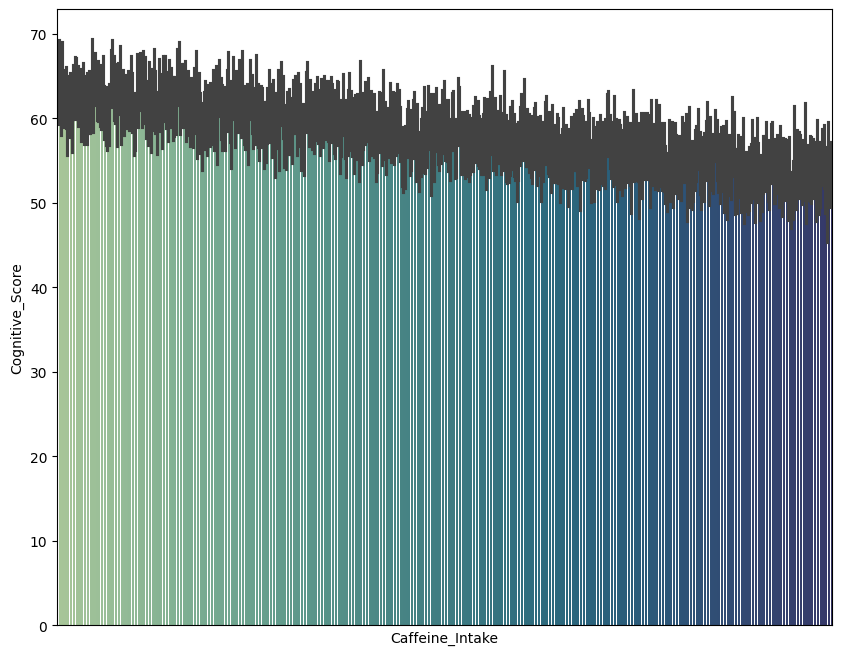

In [20]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x='Caffeine_Intake', y='Cognitive_Score', palette='crest')
plt.xticks([])
plt.show()

In [21]:
df = df.drop('User_ID', axis=1)
df.head()

,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78


In [22]:
x = num.drop('Cognitive_Score', axis=1)
y = num['Cognitive_Score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = model.score(x_test, y_test)
print(accuracy)


0.9875256736257821


In [23]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.9875256736257821
Mean Squared Error: 6.574208796344859


In [24]:
df.columns

Index(['Age', 'Gender', 'Sleep_Duration', 'Stress_Level', 'Diet_Type',
       'Daily_Screen_Time', 'Exercise_Frequency', 'Caffeine_Intake',
       'Reaction_Time', 'Memory_Test_Score', 'Cognitive_Score',
       'AI_Predicted_Score'],
      dtype='object')

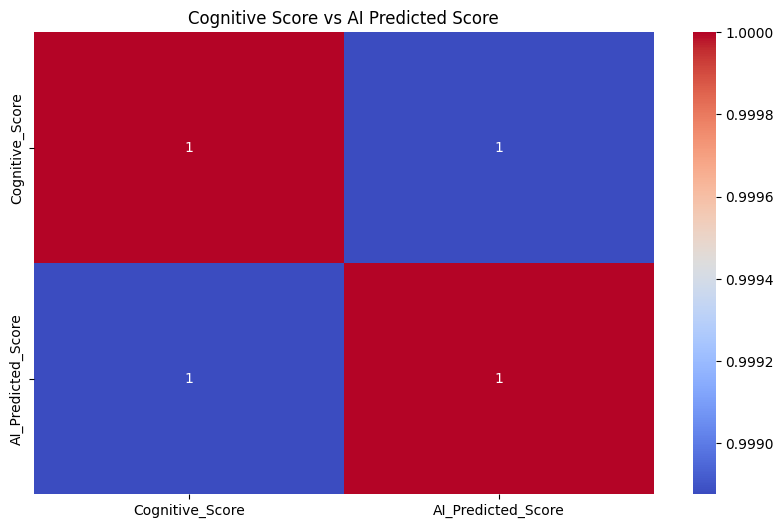

In [25]:
# cognitive score vs ai predicted score

plt.figure(figsize=(10, 6))
c_ai = df.groupby('Cognitive_Score')['AI_Predicted_Score'].mean().reset_index()
corr_matrix_c_ai = c_ai.corr()
sns.heatmap(corr_matrix_c_ai, annot=True, cmap='coolwarm')
plt.title('Cognitive Score vs AI Predicted Score')
plt.show()

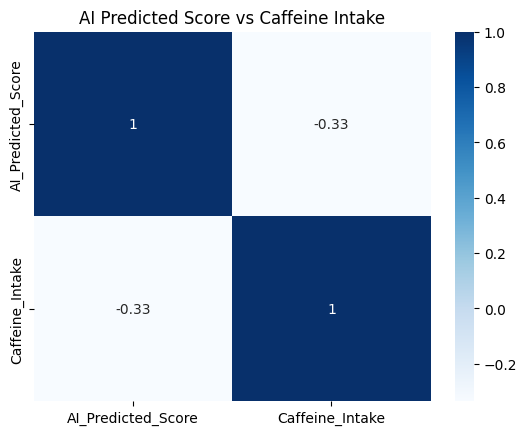

In [26]:
# ai predicted score vs caffeine intake

ai_caffeine = df.groupby('AI_Predicted_Score')['Caffeine_Intake'].mean().reset_index()
corr_matrix_ai_caffeine = ai_caffeine.corr()
sns.heatmap(corr_matrix_ai_caffeine, annot=True, cmap='Blues')
plt.title('AI Predicted Score vs Caffeine Intake')
plt.show()

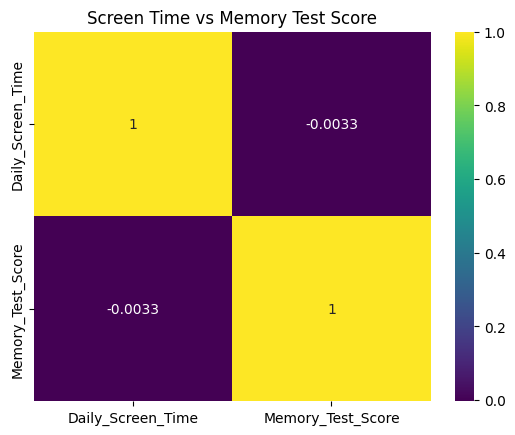

In [27]:
screen_memory = df.groupby('Daily_Screen_Time')['Memory_Test_Score'].mean().reset_index()
corr_matrix_screen_memory = screen_memory.corr()
sns.heatmap(corr_matrix_screen_memory, annot=True, cmap='viridis')
plt.title('Screen Time vs Memory Test Score')
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

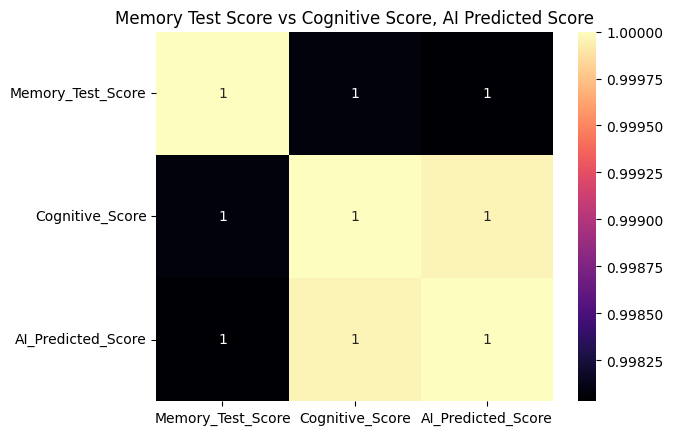

In [28]:
memory_cognitive_ai = df.groupby('Memory_Test_Score')[['Cognitive_Score', 'AI_Predicted_Score']].mean().reset_index()
corr_matrix_memory_cognitive_ai = memory_cognitive_ai.corr()
sns.heatmap(corr_matrix_memory_cognitive_ai, annot=True, cmap='magma')
plt.title('Memory Test Score vs Cognitive Score, AI Predicted Score')
plt

Text(0.5, 1.0, 'Diet Type vs Memory Test Score')

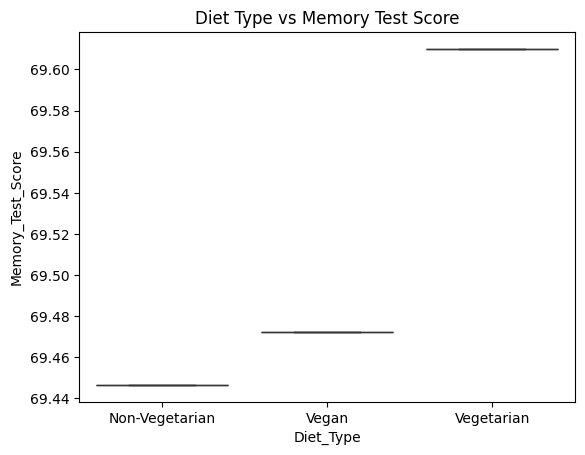

In [36]:
diet_memory = df.groupby('Diet_Type')['Memory_Test_Score'].mean().reset_index()
sns.boxplot(data=diet_memory, x='Diet_Type', y='Memory_Test_Score', palette='viridis')
plt.title('Diet Type vs Memory Test Score')

Text(0.5, 1.0, 'Exercise Frequency vs Memory Test Score')

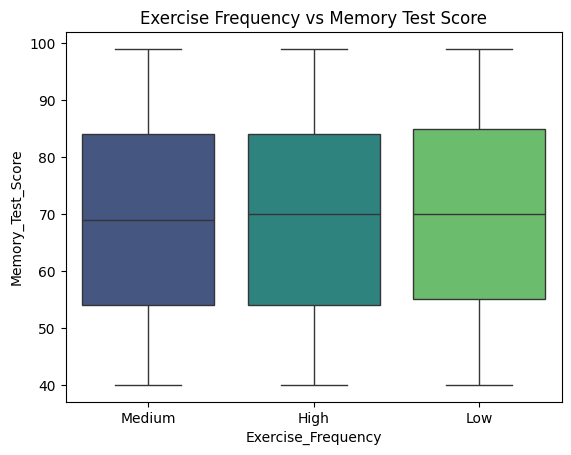

In [30]:
sns.boxplot(data=df, x='Exercise_Frequency', y='Memory_Test_Score', palette='viridis')
plt.title('Exercise Frequency vs Memory Test Score')

([], [])

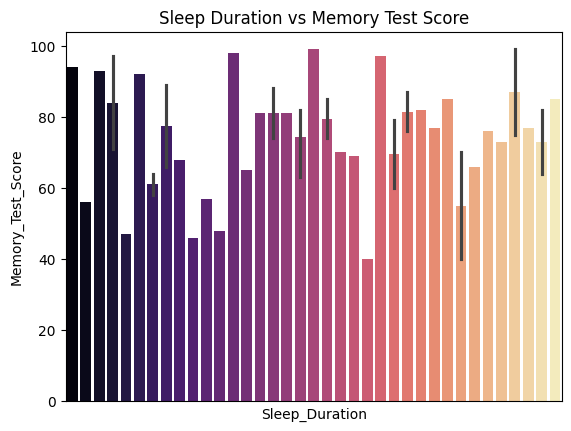

In [41]:
sample = df.sample(50)
sns.barplot(data=sample, x='Sleep_Duration', y='Memory_Test_Score', palette='magma')
plt.title('Sleep Duration vs Memory Test Score')
plt.xticks([])

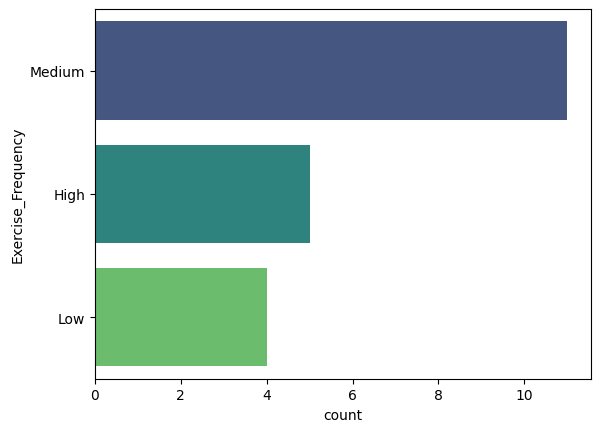

In [32]:
sample = df.sample(20)
sns.countplot(sample['Exercise_Frequency'], palette = 'viridis')
plt.show()

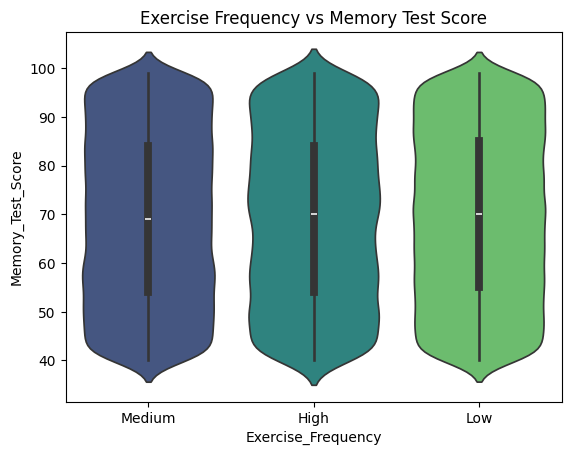

In [33]:
import seaborn as sns
sns.violinplot(data=df, x='Exercise_Frequency', y='Memory_Test_Score', palette='viridis')
plt.title('Exercise Frequency vs Memory Test Score')
plt.show()

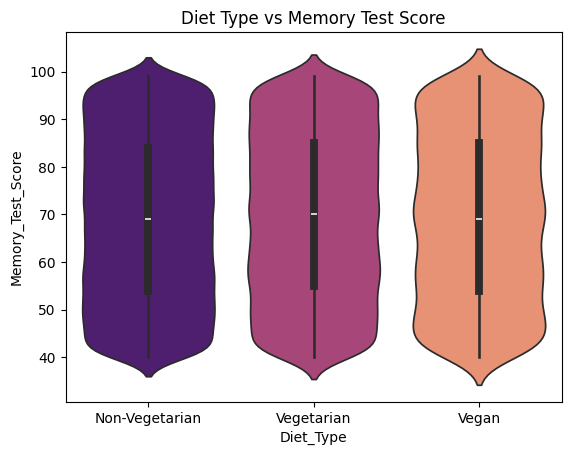

In [35]:
sns.violinplot(data=df, x='Diet_Type', y='Memory_Test_Score',palette='magma')
plt.title('Diet Type vs Memory Test Score')
plt.show()

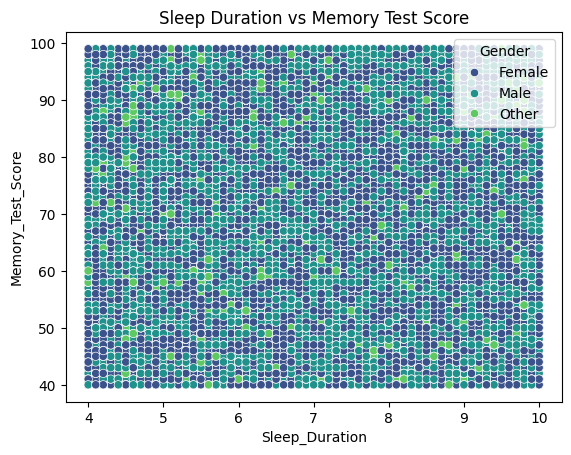

In [44]:
sns.scatterplot(data=df, x='Sleep_Duration', y='Memory_Test_Score',hue='Gender', palette='viridis')
plt.title('Sleep Duration vs Memory Test Score')
plt.show()

0.6583168852228185


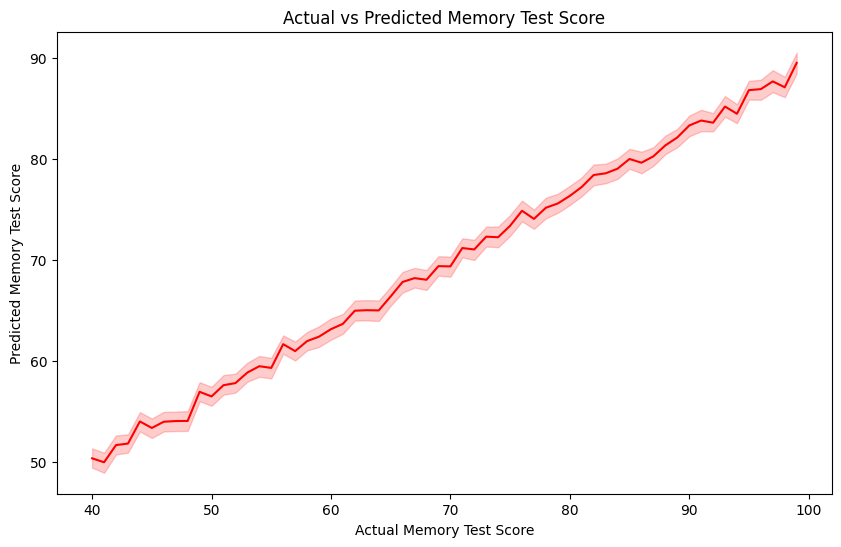

In [49]:
x = num.drop('Memory_Test_Score', axis=1)
y = num['Memory_Test_Score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = model.score(x_test, y_test)
print(accuracy)

plt.figure(figsize=(10, 6))
sns.lineplot(x=y_test, y=y_pred, color='red')
plt.xlabel('Actual Memory Test Score')
plt.ylabel('Predicted Memory Test Score')
plt.title('Actual vs Predicted Memory Test Score')
plt.show()